# Part 1 - 2008 Flight Data Exploration
## by (Mukhtar Abimbola)

## Introduction
> This dataset reports flight operations in the United States, including information on the carriers, arrival and departure delays,reasons for delays,cancellations as well as diversions in the first quarter of 2008. The aim of this data exploration is to get insights on the variables affecting flights operational performance. 



## Preliminary Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from matplotlib.ticker import MultipleLocator


In [2]:
#Loading airline data set
airline_data = pd.read_csv('Airline_2008.csv')

airline_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [3]:
#Loading plane data set; this dataset contains information about each aircraft/carrier
df_plane = pd.read_csv('plane-data.csv')

df_plane.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tailnum        5029 non-null   object
 1   type           4480 non-null   object
 2   manufacturer   4480 non-null   object
 3   issue_date     4480 non-null   object
 4   model          4480 non-null   object
 5   status         4480 non-null   object
 6   aircraft_type  4480 non-null   object
 7   engine_type    4480 non-null   object
 8   year           4480 non-null   object
dtypes: object(9)
memory usage: 353.7+ KB


In [4]:
#Renaming some column names in the airline dataset
airline_data.rename(columns = {'DepTime':'DepartureTime', 'TailNum':'TailNum ' ,'CRSDepTime':'ScheduledDepartureTime','ArrTime':'ArrivalTime',
                               'CRSArrTime':'ScheduledArrivalTime','ArrDelay':'ArrivalDelayTime','DepDelay':'DepartureDelayTime','Dest':'Destination', 
                               'NASDelay':'National_AirSystem_Delay'}, inplace=True)


In [5]:
#Changing the Day from numbers to actual week day names

days ={1:'Monday', 2:'Tuesday',3:'Wednessday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}

airline_data['DayOfWeek'] = airline_data['DayOfWeek'].map(days).fillna(airline_data['DayOfWeek']).astype(object)

In [6]:
#Renaming cancellation codes with their meaning

cancellation_codes = {'A':'Carrier','B':'Weather','C':'National AirSystem','D':'Security','NaN':'Not Cancelled'}

airline_data['CancellationCode'] = airline_data['CancellationCode'].map(cancellation_codes).fillna(airline_data['CancellationCode']).astype(object)


In [7]:
#converting month to three letter format

airline_data['Month'] = pd.to_datetime(airline_data['Month'],format = '%m').dt.month_name().str.slice(stop=3)


In [8]:
#rename tailnum column name to match column in airline data set

df_plane.rename(columns={'tailnum':'TailNum ', 'year':'Manufacture Year'}, inplace=True)


In [9]:
df_airline_plane = pd.merge(airline_data, df_plane, on='TailNum ')

print(df_airline_plane.shape)
df_airline_plane.sample(10)


(2262266, 37)


,Year,Month,DayofMonth,DayOfWeek,DepartureTime,ScheduledDepartureTime,ArrivalTime,ScheduledArrivalTime,UniqueCarrier,FlightNum,...,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,Manufacture Year
2009773,2008,Mar,11,Tuesday,623.0,630,1107.0,1040,AA,558,...,0.0,0.0,Corporation,MCDONNELL DOUGLAS,06/11/1992,DC-9-83(MD-83),Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
464814,2008,Feb,21,Thursday,1936.0,1920,2118.0,2112,XE,2912,...,NaN,NaN,Corporation,EMBRAER,10/01/2002,EMB-145LR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
1884442,2008,Apr,14,Monday,1648.0,1650,1834.0,1825,AA,1198,...,NaN,NaN,Corporation,MCDONNELL DOUGLAS,12/30/1999,DC-9-82(MD-82),Valid,Fixed Wing Multi-Engine,Turbo-Fan,1983
454013,2008,Apr,7,Monday,1648.0,1650,1915.0,1913,XE,2671,...,NaN,NaN,Corporation,EMBRAER,05/31/2002,EMB-135LR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2001
249916,2008,Mar,21,Friday,640.0,630,752.0,745,WN,546,...,NaN,NaN,Corporation,BOEING,05/20/2004,737-3H4,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1994
2000231,2008,Mar,25,Tuesday,1225.0,1120,1800.0,1659,AA,1082,...,0.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140816,2008,Mar,8,Saturday,1525.0,1455,1810.0,1753,B6,1242,...,0.0,12.0,Corporation,EMBRAER,02/15/2007,ERJ 190-100 IGW,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
1460066,2008,Jan,26,Saturday,1901.0,1823,2134.0,2059,FL,756,...,0.0,0.0,Corporation,BOEING,09/12/2002,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
2188204,2008,Apr,25,Friday,559.0,600,1205.0,1150,CO,416,...,0.0,0.0,Corporation,BOEING,05/05/1994,737-524,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1994
865377,2008,Jan,14,Monday,NaN,907,NaN,1024,OO,5499,...,NaN,NaN,Corporation,EMBRAER,07/10/1998,EMB-120ER,Valid,Fixed Wing Multi-Engine,Turbo-Prop,1994


In [10]:
#Combined datas set info
df_airline_plane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262266 entries, 0 to 2262265
Data columns (total 37 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Year                      int64  
 1   Month                     object 
 2   DayofMonth                int64  
 3   DayOfWeek                 object 
 4   DepartureTime             float64
 5   ScheduledDepartureTime    int64  
 6   ArrivalTime               float64
 7   ScheduledArrivalTime      int64  
 8   UniqueCarrier             object 
 9   FlightNum                 int64  
 10  TailNum                   object 
 11  ActualElapsedTime         float64
 12  CRSElapsedTime            float64
 13  AirTime                   float64
 14  ArrivalDelayTime          float64
 15  DepartureDelayTime        float64
 16  Origin                    object 
 17  Destination               object 
 18  Distance                  int64  
 19  TaxiIn                    float64
 20  TaxiOut                 

# **Dataset Structure**

The data set contains over two million records (2,262,266) of commercial airlines operations across various airports in the USA. It consist of 37 variables associated with specific airlines operations and aircraft design parameters.Notable among these variables are:
> - Arrival and departure times. 
> - Arrival and departure delays.
> - Cancellations and diversions.
> - Aircraft type and engine type, including their manufacturer and manufacture years.

# **Features of Interest**

This analysis explores the factors and conditions that affects the airline operations in the following variables
> - Cancellations.
> - Divertions. 
> - Delays

In addition, the following variables/features were also used in supporting the investigations of the features of interest:
> - Cancellation codes
> - Aircraft engine types
> - Aircraft types


# **Univariate Exploration**

### **Question:What percentage of the total number of flights were cancelled and diverted**


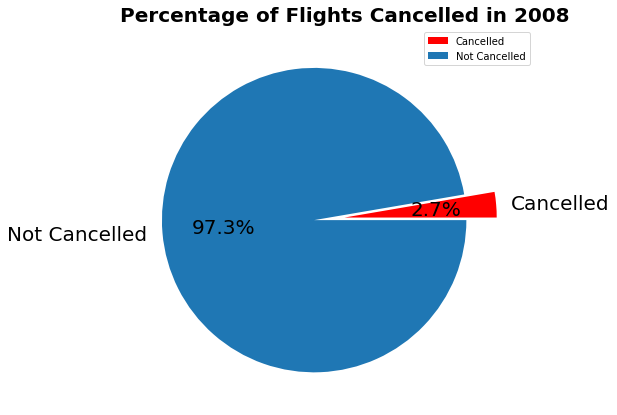

In [11]:
Flight_Cancelled = airline_data[airline_data['Cancelled']==1].count()['Cancelled']
Flight_NotCancelled = airline_data[airline_data['Cancelled']==0].count()['Cancelled']

data_plot = [Flight_Cancelled,Flight_NotCancelled]
labels = ['Cancelled','Not Cancelled']
explode = [0,0.2]
color =['r',sb.color_palette()[0]]

fig = plt.figure(figsize =(10, 7))
plt.pie(data_plot, labels=labels, colors=color, explode=explode, autopct = '%.1f%%', textprops={'fontsize': 20})
plt.legend(loc=1)
plt.title('Percentage of Flights Cancelled in 2008', fontsize=20, fontweight='bold')
plt.show();




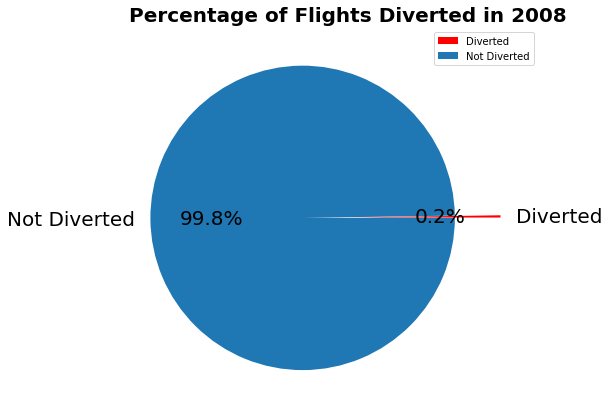

In [12]:
Flight_Diverted = airline_data[airline_data['Diverted']==1].count()['Diverted']
Flight_NotDiverted = airline_data[airline_data['Diverted']==0].count()['Diverted']

data_plot = [Flight_Diverted,Flight_NotDiverted]
labels = ['Diverted','Not Diverted']
explode = [0,0.3]
color = ['r', sb.color_palette()[0]]


fig = plt.figure(figsize =(10, 7))
plt.pie(data_plot, labels=labels, colors=color, explode=explode,autopct = '%.1f%%', textprops={'fontsize': 20})
plt.legend(loc=1)
plt.title('Percentage of Flights Diverted in 2008', fontsize=20, fontweight='bold')
plt.show()

The visializations above shows that a remarkable number of flights were not cancelled and diverted in the first quarter of 2008. Out of the 2,389,217 flight movements, only 2.7% of the flights were cancelled while 0.2% were diverted.

### **Question:What is the percentage of arrival and departure delays**

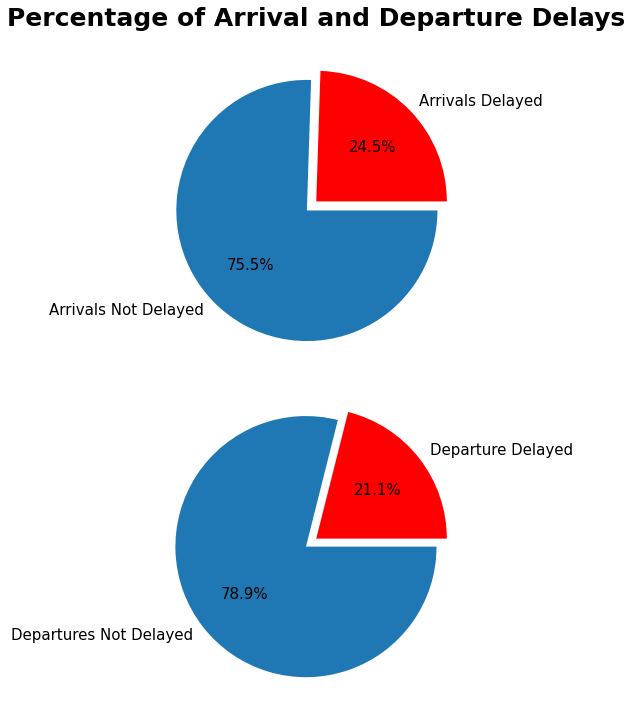

In [13]:
#Getting counts of flights delayed and not delayed on arrival
Arrival_Delayed = df_airline_plane[df_airline_plane['ArrivalDelayTime']>15].count()['ArrivalDelayTime']
Arrival_NotDelayed = df_airline_plane[df_airline_plane['ArrivalDelayTime']<15].count()['ArrivalDelayTime']

#Getting counts of flights delayed and not delayed on departure
Departure_Delayed = df_airline_plane[df_airline_plane['DepartureDelayTime']>15].count()['DepartureDelayTime']
Departure_NotDelayed = df_airline_plane[df_airline_plane['DepartureDelayTime']<15].count()['DepartureDelayTime']

#Plotting the pie charts side by side
Arrival_data_plot = [Arrival_Delayed,Arrival_NotDelayed]
label_arr = ['Arrivals Delayed','Arrivals Not Delayed']

Departure_data_plot = [Departure_Delayed,Departure_NotDelayed]
label_dep = ['Departure Delayed','Departures Not Delayed']

fig = plt.figure(figsize=(15,10))
explode = [0,0.1]
color =['r', sb.color_palette()[0]]

plt.subplot(2,1,1)
plt.pie(Arrival_data_plot, labels=label_arr, colors=color, explode=explode,autopct = '%.1f%%', textprops={'fontsize':15})
#plt.legend(loc=1,bbox_to_anchor=(1.8,1.1))


plt.subplot(2,1,2)
plt.pie(Departure_data_plot, labels=label_dep, colors=color, explode=explode,autopct = '%.1f%%', textprops={'fontsize': 15})
#plt.legend(loc=1,bbox_to_anchor=(1.8,1.1))

fig.suptitle('Percentage of Arrival and Departure Delays', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


The pie charts shows that 76% of the flights were not delayed and 25% of the flights were delayed on arrival. Similarly, 79% of the flights were not delayed on departure while 21% were delayed. 

### **Question: What are the reasons for the cancellations**

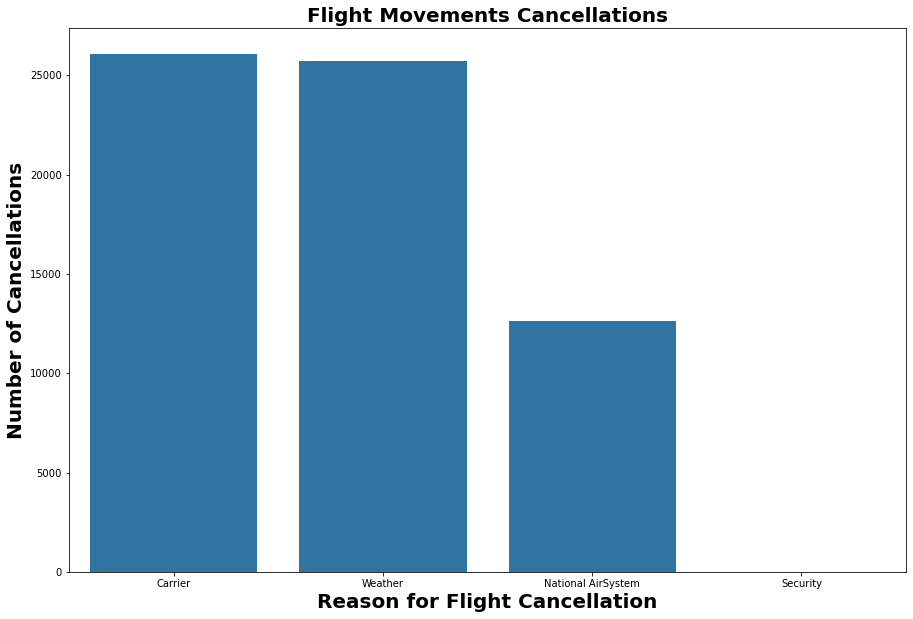

In [14]:
def chartLabels(x_label,y_label,Chart_title):
    plt.xlabel(x_label,fontsize=20, fontweight='bold')
    plt.ylabel(y_label,fontsize=20,fontweight='bold')
    plt.title(Chart_title, fontsize=20,fontweight='bold')
    
    
fig = plt.figure(figsize=(15,10))
base_color = sb.color_palette()[0]
freq = airline_data['CancellationCode'].value_counts()
order = freq.index
sb.countplot(data= airline_data, x='CancellationCode', color=base_color, order=order)
chartLabels('Reason for Flight Cancellation', 'Number of Cancellations', 'Flight Movements Cancellations')

The flight cancellations were due to carrier, weather, national air system and security issues. Of all the cancellations, carrier contributed mostly to the numbers, with more than 26,000 followed by weather with 25,000 and national air system respectively. Security issues had no significant contributions to the flight movement cancellations.

### **Question: Which carriers have the highest number of cancellations**

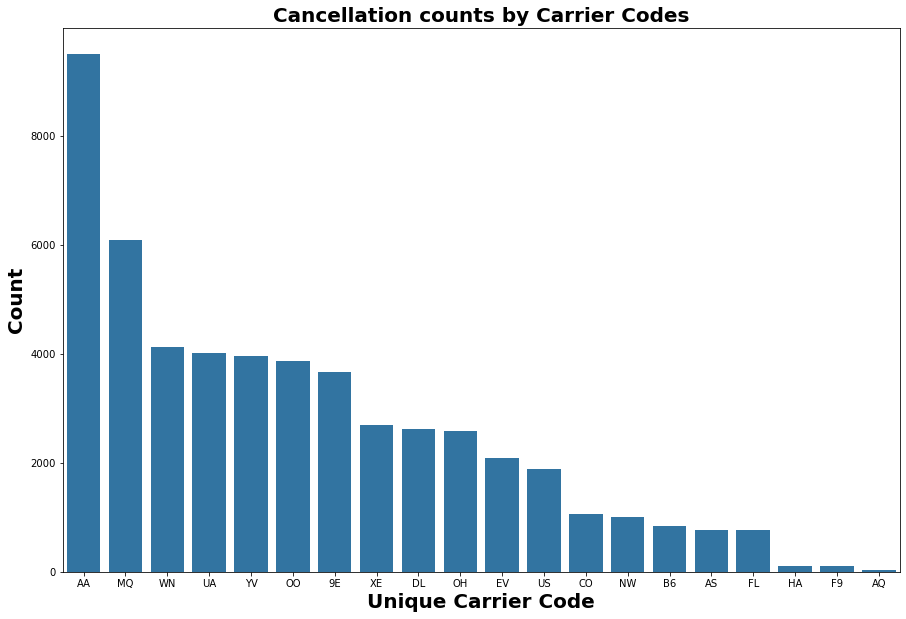

In [15]:
#getting a subset data for all flight movement with cancellations
df_cancellations = airline_data.query('CancellationCode in ["Carrier", "National_AirSystem_Delay", "Weather", "Security"]')

#Getting frequency of carrier cancellations
freq_carriers_cancellations=df_cancellations.UniqueCarrier.value_counts()
order = freq_carriers_cancellations.index

#Plotting
base_color=sb.color_palette()[0]
plt.figure(figsize=(15,10))
sb.countplot(data=df_cancellations, x='UniqueCarrier', color=base_color, order=order)
chartLabels('Unique Carrier Code','Count','Cancellation counts by Carrier Codes')

Out of the all unique carriers across USA, it can be seen that American Airline(AA), American Eagle Airline Inc(MQ) and Skywest Airline Inc(OO) are the top 3 carriers with the highest number of cancellations across all the cancellation reasons.

### **Question: Which days had the highest number of diversions and non-diversions**

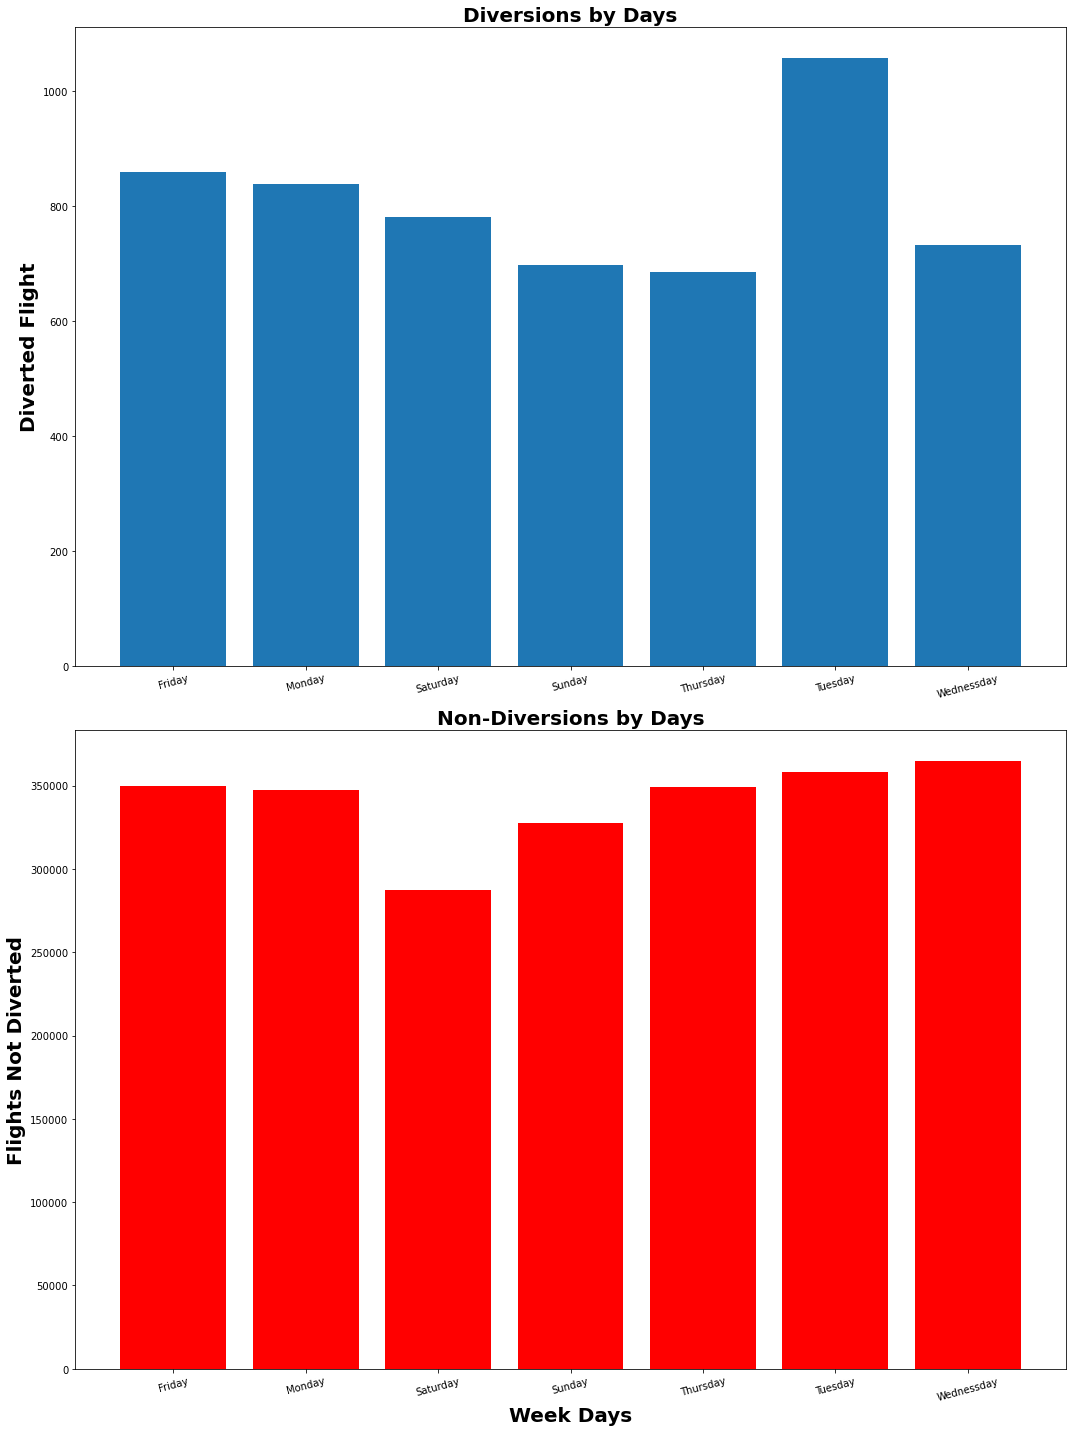

In [16]:
#Getting dataframe for diversons by day
df_diversion = airline_data.groupby(['DayOfWeek','Diverted']).size()
df_diversion = df_diversion.reset_index(name='count')
diversion_yes = df_diversion.query('Diverted ==1')
diversion_no = df_diversion.query('Diverted ==0')

color =sb.color_palette()[1]
fig = plt.figure(figsize=(15,20))
plt.subplot(2,1,1)
x = diversion_yes['DayOfWeek']
y = diversion_yes['count']
plt.bar(x,y)
plt.xticks(rotation=15)
chartLabels('', 'Diverted Flight', 'Diversions by Days')

plt.subplot(2,1,2)
x = diversion_no['DayOfWeek']
y = diversion_no['count']
plt.bar(x,y, color='r')
plt.xticks(rotation=15)
chartLabels('Week Days', 'Flights Not Diverted', 'Non-Diversions by Days')

fig.tight_layout()


The number of diversions ranges from 686 to 1,058 while that of non-diversions ranges from 287,316 to about 370,000. Of all these,flights were mostly diverted on Tuesdays and least diverted on Thursdays which could mean weather conditions were not always favorable to flight activities on tuesdays and most favorable on Thursdays. On the other hand,the numbers of flights that were not diverted are almost equal across the week days except on saturdays that the numbers were lower. 

### **Question: Which carriers have highest delays on arrival and departure**

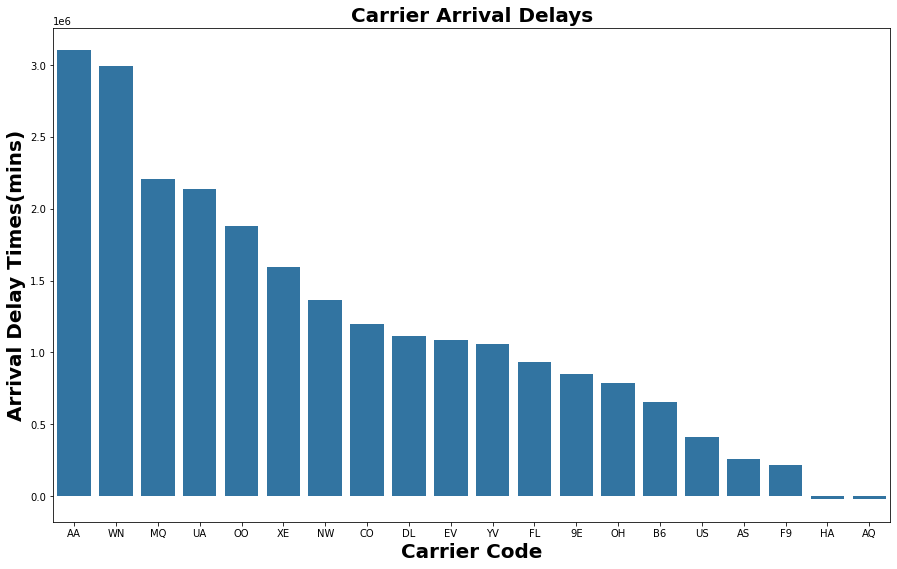

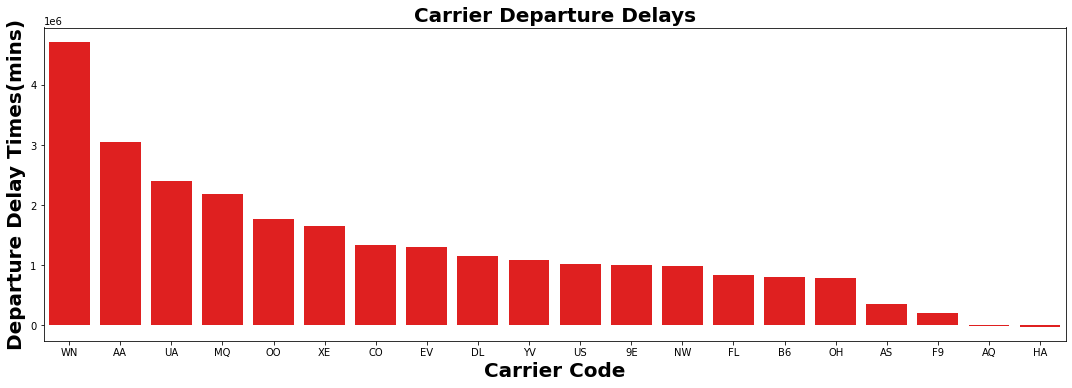

In [17]:
#Getting a dataframe for arrival delay time without NaN values
arrival_delays = airline_data[airline_data.ArrivalDelayTime.notnull()]

#Groupby carrier code and get sum of delay time for each of the carriers in descending order of magnitude
carrier_Arrival_delay = arrival_delays.groupby('UniqueCarrier').ArrivalDelayTime.sum().sort_values(ascending=False)

#Performing similar previous operations for departure delay times

departure_delays = airline_data[airline_data.DepartureDelayTime.notnull()]
carrier_Departure_delay = departure_delays.groupby('UniqueCarrier').DepartureDelayTime.sum().sort_values(ascending=False)

#Plotting
fig = plt.figure(figsize=(15,20))
color=sb.color_palette()[0]
plt.subplot(2,1,1)
sb.barplot(y=carrier_Arrival_delay.values, x=carrier_Arrival_delay.index, color=color)
chartLabels('Carrier Code','Arrival Delay Times(mins)','Carrier Arrival Delays')

fig = plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
sb.barplot(y=carrier_Departure_delay.values, x=carrier_Departure_delay.index, color='r')
chartLabels('Carrier Code','Departure Delay Times(mins)','Carrier Departure Delays')

fig.tight_layout()


Cumulatively, American Airline(AA) had the highest arrival delays followed by South Western airline(WN) while Aloha airline(AQ), Hawaiian Airline(HA) and Frontier Airline(F9) had the least delays on arrival. For departure delays, WN had the highest delays while HA, AQ and F9 had the lowest delays.Recall that carriers AA and MQ had the high cancellation rate while F9,HA,AQ were among the least cancelled flights. With this premise, one could adjudge carriers F9,AQ and HA as best and more reliable airlines wile AA and MQ could be regarded unreliable.

## **Question: What is the average time for each delay reasons**

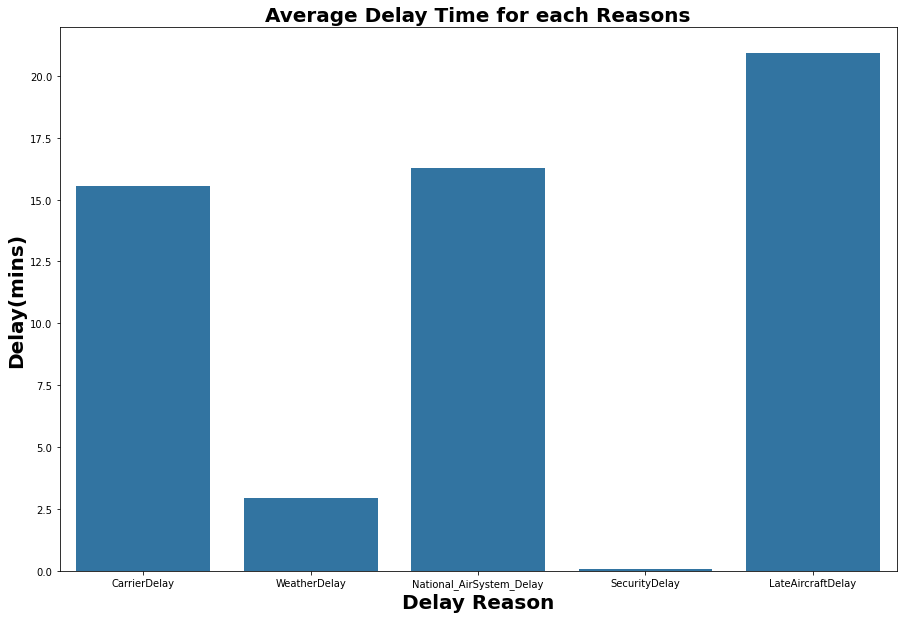

In [18]:
# query all delays and get mean values
delay_reasons = df_airline_plane[['CarrierDelay','WeatherDelay','National_AirSystem_Delay','SecurityDelay','LateAircraftDelay']].mean().rename_axis('Delay').reset_index(name = 'minutes')

fig = plt.figure(figsize=(15,10))
sb.barplot( data = delay_reasons, x ='Delay', y = 'minutes', color = color)
chartLabels('Delay Reason','Delay(mins)','Average Delay Time for each Reasons')


Late aircraft reason had the highest average delay time, about 22 minutes, followed by National air system delay( about 16 minutes) and carrier delay(approximately 15 minutes) respectively.Security reason had the least average delay time while average delay time due to weather conditions was aabout 2.6 minutes. Recall, security reasons also contributed least to cancellations which clearly shows that security is not a threat to airline performance in the USA.

### **Question: What is the distribution of Scheduled arrival time and Actual arrival time**

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


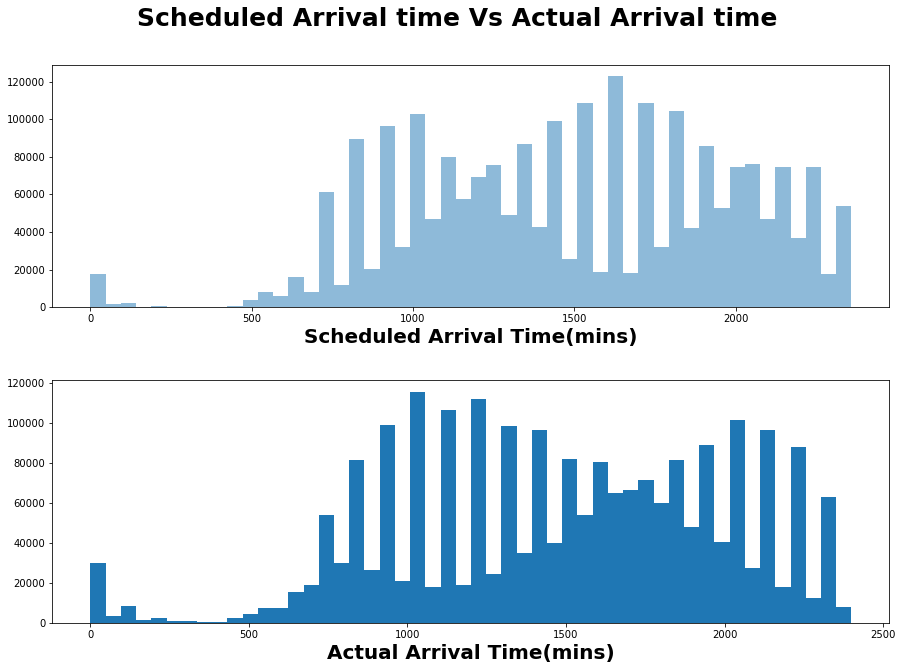

In [19]:
fig =plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
color=sb.color_palette()[0]
sb.distplot(df_airline_plane.ScheduledArrivalTime, kde = False, hist_kws = {'alpha' : 0.5});
chartLabels('Scheduled Arrival Time(mins)','','')

plt.subplot(2,1,2)
color=sb.color_palette()[1]
sb.distplot(df_airline_plane.ArrivalTime, kde = False,hist_kws = {'alpha' : 1});
chartLabels('Actual Arrival Time(mins)','','')

fig.suptitle('Scheduled Arrival time Vs Actual Arrival time', fontsize=25, fontweight='bold')

plt.subplots_adjust(top=0.9, hspace=0.3)

Similarly for departure times:

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


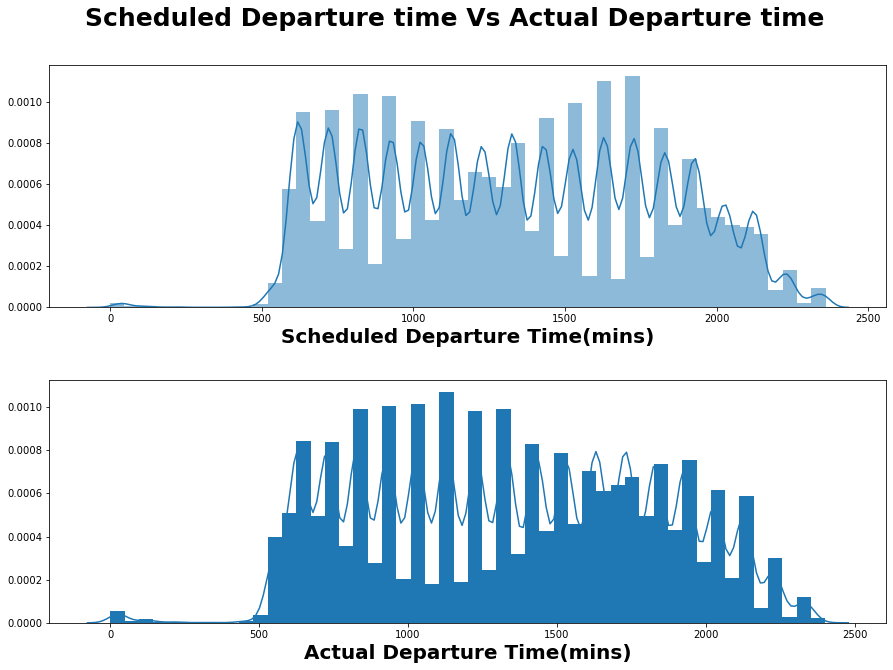

In [20]:
fig =plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
color=sb.color_palette()[0]
sb.distplot(df_airline_plane.ScheduledDepartureTime, kde = True, hist_kws = {'alpha' : 0.5});
chartLabels('Scheduled Departure Time(mins)','','')

plt.subplot(2,1,2)
color=sb.color_palette()[1]
sb.distplot(df_airline_plane.DepartureTime, kde = True, hist_kws = {'alpha' : 1});
chartLabels('Actual Departure Time(mins)','','')

fig.suptitle('Scheduled Departure time Vs Actual Departure time', fontsize=25, fontweight='bold')

plt.subplots_adjust(top=0.9, hspace=0.3)

The above histograms shows the deviations between the scheduled and actual arrival times confirming flight delays across airline operations. Similarly, there are variations between the scheduled and actual departure times. These ascertains that there are arrival and departure delays which follows a particular distribution across each delay reasons.

> - Delving more to determine the distribution of the delay times, flight delay times greater than 15 minutes were only considered as delays. This is in accordance to the US Federal Aviaition Administration Law.

In [21]:
#getting arrival and departure delay dataframe 
df_arrival_delay = df_airline_plane[df_airline_plane.ArrivalDelayTime>15]
df_departure_delay = df_airline_plane[df_airline_plane.DepartureDelayTime>15]


In [22]:
#checking the descriptive statisitcs to enable axis limit set on the hist plot
df_arrival_delay['ArrivalDelayTime'].describe()

count    542059.000000
mean         57.372364
std          56.310853
min          16.000000
25%          24.000000
50%          38.000000
75%          70.000000
max        2461.000000
Name: ArrivalDelayTime, dtype: float64

In [23]:
df_departure_delay['DepartureDelayTime'].describe()

count    468104.000000
mean         59.317867
std          57.528930
min          16.000000
25%          25.000000
50%          40.000000
75%          73.000000
max        2467.000000
Name: DepartureDelayTime, dtype: float64

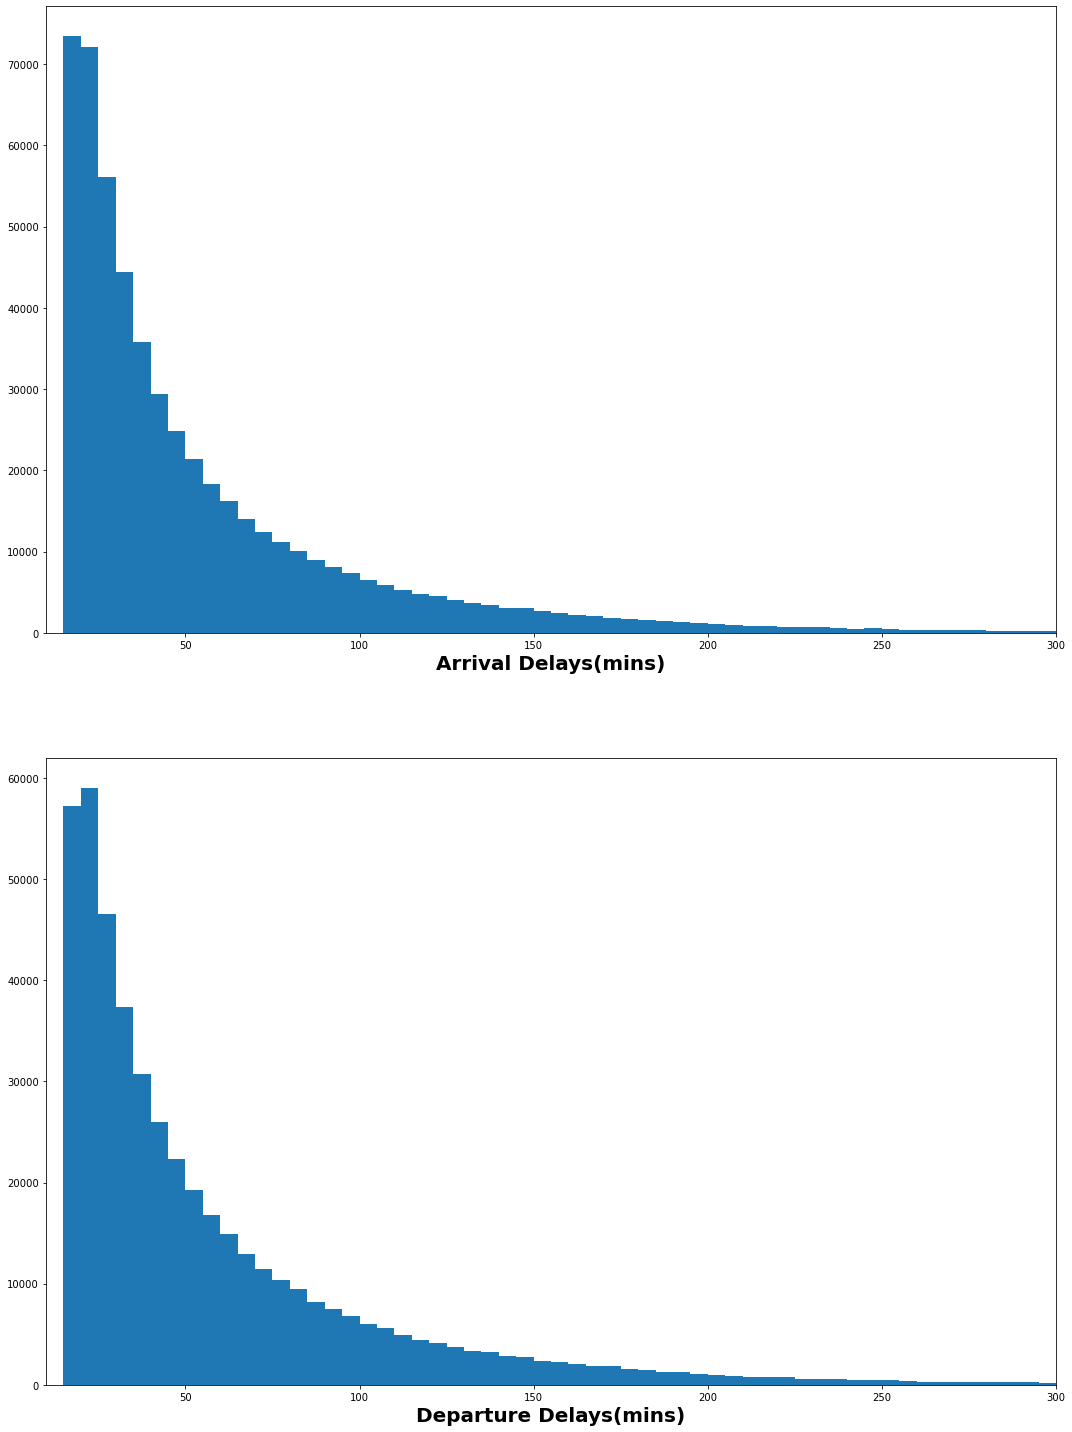

In [24]:
#Plotting histogram to determine the delay time distributions.
# x limit of 300 was set to ensure the data are captures the descriptive statisitcs
plt.figure(figsize=(15,20))

plt.subplot(2,1,1)
bin_edges=np.arange(10,df_arrival_delay['ArrivalDelayTime'].max()+10,5)
plt.hist(df_arrival_delay.ArrivalDelayTime,bins=bin_edges)
plt.xlim(10,300)
chartLabels('Arrival Delays(mins)','','')

plt.subplot(2,1,2)
bin_edges=np.arange(10,df_departure_delay['DepartureDelayTime'].max()+10,5)
plt.hist(df_departure_delay.DepartureDelayTime,bins=bin_edges)
plt.xlim(10,300)
chartLabels('Departure Delays(mins)','','')

fig.suptitle('Distribution of Arrival and Departure Delays', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(hspace=0.2)

The histogram shows a right skewwed, long-tailed distribution for both arrival and departure delays. Details will be presented in the discussion section. 

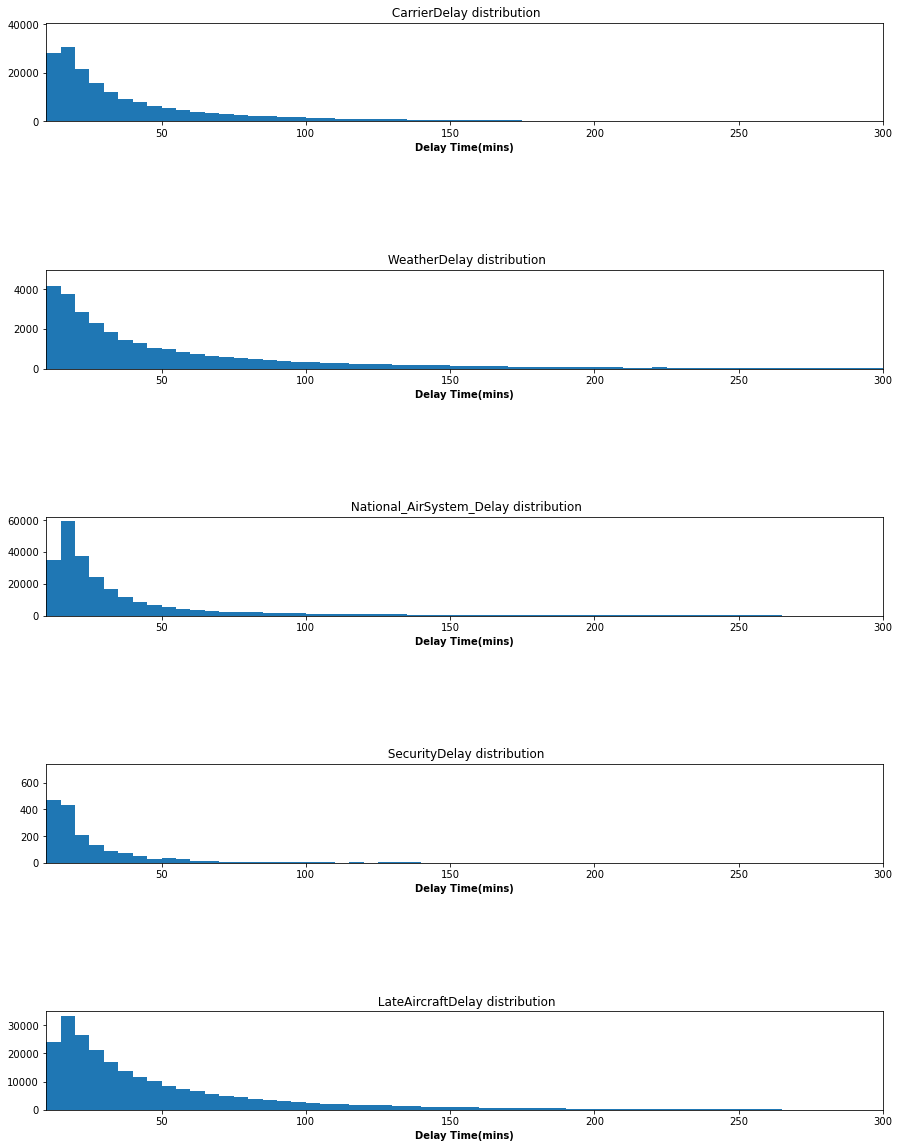

In [25]:
fig,ax = plt.subplots(5, 1, figsize=(15, 20))
fig.subplots_adjust(hspace=1.5)
color = sb.color_palette()[0]
#enumerate method was used to ensure easy iteration
for i, reasons in enumerate(['CarrierDelay','WeatherDelay','National_AirSystem_Delay','SecurityDelay','LateAircraftDelay']):
    data = df_airline_plane[df_airline_plane[reasons]>0]
    bin_edges = np.arange(0, data[reasons].max()+5, 5)
    ax[i].hist(data[reasons], bins = bin_edges, color=color)
    ax[i].set_xlabel('Delay Time(mins)', fontweight='bold');
    ax[i].set_title(f' {reasons} distribution');
    ax[i].set_xlim(10,300)

The histogram plots shows a right skewwed, long-tailed distribution for all the delay reasons. Details in the discussion section.

## **Discussion of variable of interest**

### **Cancellations**
> - Flight cancellations in year 2008 was insignificant, only 2.7% of the flights were cancelled due to carrier, weather, national air system and security reasons. Of all the cancellations, carrier contributed mostly to the numbers, with more than 26,000 followed by weather with 25,000 and national air system respectively. Security issues had no significant contributions to the flight movement cancellations. 

> - Across all the unique carriers across USA, American Airline(AA), American Eagle Airline Inc(MQ) and Skywest Airline Inc(OO) are the top 3 carriers with the highest number of cancellations in all the cancellation reasons.



### **Diversions**
> -  A remarkable number of flights were not diverted in 2008. Out of the 2,389,217 flight movements 0.2% were diverted which might be as a result of bad weather conditions or unstable instrument landing system.

> - The number of diversions ranges from 686 to 1,058 while that of non-diversions ranges from 287,316 to about 370,000. Of all these,flights were mostly diverted on Tuesdays and least diverted on Thursdays which could mean weather conditions were not always favorable to flight activities on tuesdays and most favorable on Thursdays. On the other hand,the numbers of flights that were not diverted are almost equal across the week days except on saturdays that the numbers were lower


### **Delays**
> - On arrival,76% of the flights were not delayed and 25% of the flights were delayed. Similarly, 79% of the flights were not delayed on departure while 21% were delayed.

> - For the airlines, American Airline(AA) had the highest arrival delays followed by South Western airline(WN) while Aloha airline(AQ), Hawaiian Airline(HA) and Frontier Airline(F9) had the least delays on arrival. For departure delays, WN had the highest delays while HA, AQ and F9 had the lowest delays.Recall that carriers AA and MQ had the high cancellation rate while F9,HA,AQ were among the least cancelled flights.

> - The histogram plots are rigthly skewed which indictes that most of the data are lower bound relative to the maximum delay times. For arrival delays, flights were delayed for almost 1 hour on average while the minimum and maximum delay times were 16minutes and 41 hours(2 days). Similarly for departure delays, flights were delayed for average of 1 hours and the maximum departure delay period is 2 days.

> - For the delay reasons, late aircraft reason had the highest average delay time, about 22 minutes, followed by National air system delay( about 16 minutes) and carrier delay(approximately 15 minutes) respectively.Security reason had the least average delay time while average delay time due to weather conditions was aabout 2.6 minutes. Their histogram also follows similar distribution; rightly skewwed with long tails with expection of Security delay which has a shorter tail. It's unlikely that these delays will be correlated with one another.


# **Bivariate Exploration**

### **Question: Does arrival delays affect departure time**


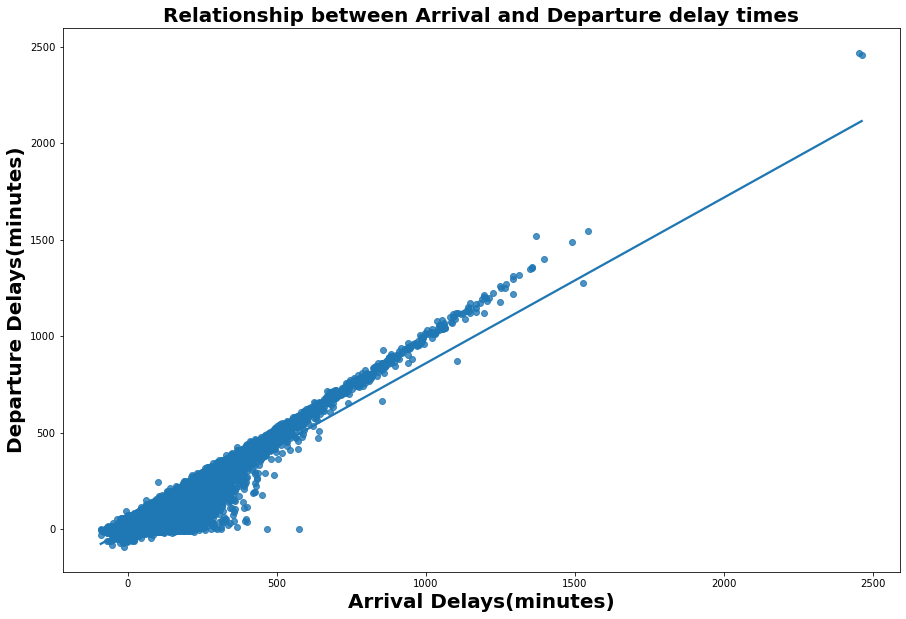

In [26]:
arrivals = airline_data.query('Cancelled==0')
fig = plt.figure(figsize=(15,10))
sb.regplot(data = arrivals, x='ArrivalDelayTime', y='DepartureDelayTime')
chartLabels('Arrival Delays(minutes)', 'Departure Delays(minutes)', 'Relationship between Arrival and Departure delay times')

The graph above shows there is a highly positive corrleation between the arriavl delay times and the departure delay times which logically implies that whenever an airline is delayed on arrival, there are tendencies for it to be delayed on departure. This explains the reason the scheduled and actual arrrival times has similar distribution as the scheduled and actual departure times from their univariate plot. 

### **Question:What is the relationship between flight distance and average arrival delay***

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


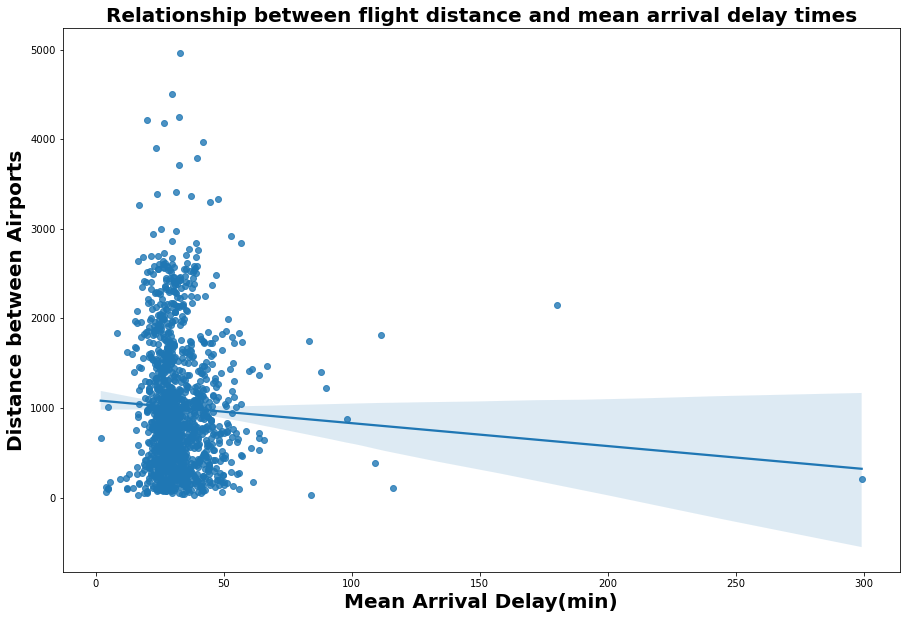

In [27]:
#calculating mean arrival delay by distance
dist_arrival=airline_data.query('ArrivalDelayTime>0').groupby('Distance')['ArrivalDelayTime'].mean()

#converting the series into a dataframe
Distance = pd.Series(dist_arrival.index, name='Distance')
Mean_DelayTime = pd.Series(dist_arrival.values,name= 'Average ArrivalDelayTime')

plt.figure(figsize=(15,10))
sb.regplot(Mean_DelayTime,Distance);
chartLabels('Mean Arrival Delay(min)','Distance between Airports', 'Relationship between flight distance and mean arrival delay times')


There is no any correlation between the flight distance and arrival delays. It is also not likely that there will be correation between the mean departure delay and flight distance since it has been established that the arrival and departure variables follows similar distribution. 

### **Question: What type of engine are mostly used by the manufacturers**

In [28]:
#getting data frame for manufacturers and engine types
manuf_engine = df_airline_plane.groupby(['manufacturer', 'engine_type']).size().reset_index(name='count')


In [29]:
manuf_engine = manuf_engine.pivot(index ='manufacturer', columns ='engine_type', values='count')

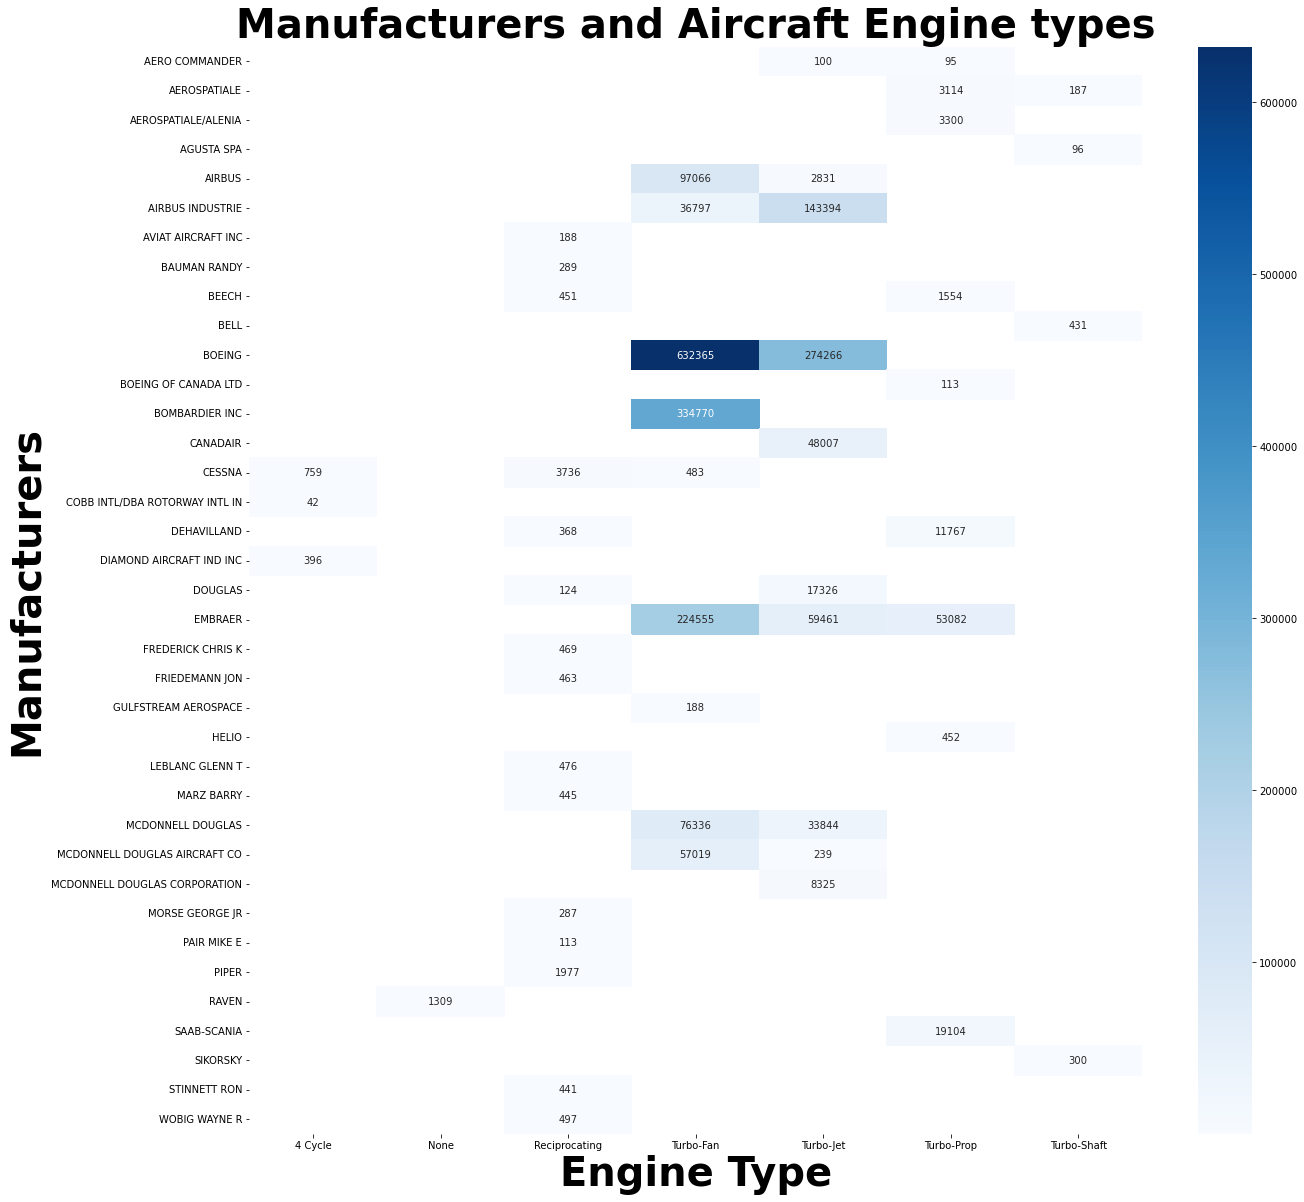

In [30]:
#plot heat map
fig,ax = plt.subplots(figsize =(20,20))
sb.heatmap(manuf_engine, annot =True, fmt ='.0f', cmap ='Blues',ax=ax)
ax.set_xlabel('Engine Type', size=(40), fontweight='bold')
ax.set_ylabel('Manufacturers', size=(40), fontweight='bold')
plt.title( 'Manufacturers and Aircraft Engine types', size = 40, fontweight='bold');

Most manufacturers used Turbo-fan,Turbo-jet, Turbo-prop and reciprocating engines. Very few use 4-cylce and Turbo-shaft engines. Of all the engine types, Turbo-fan and Turbo-Jet had the highest counts of usage and would mostly be found in most carriers. 

### **Question: What type of engine are mostly found in the carriers**

In [31]:
unique_eng = df_airline_plane.groupby(['UniqueCarrier', 'engine_type']).size().reset_index(name ='count')

unique_eng = unique_eng.pivot(index ='UniqueCarrier', columns ='engine_type', values ='count')

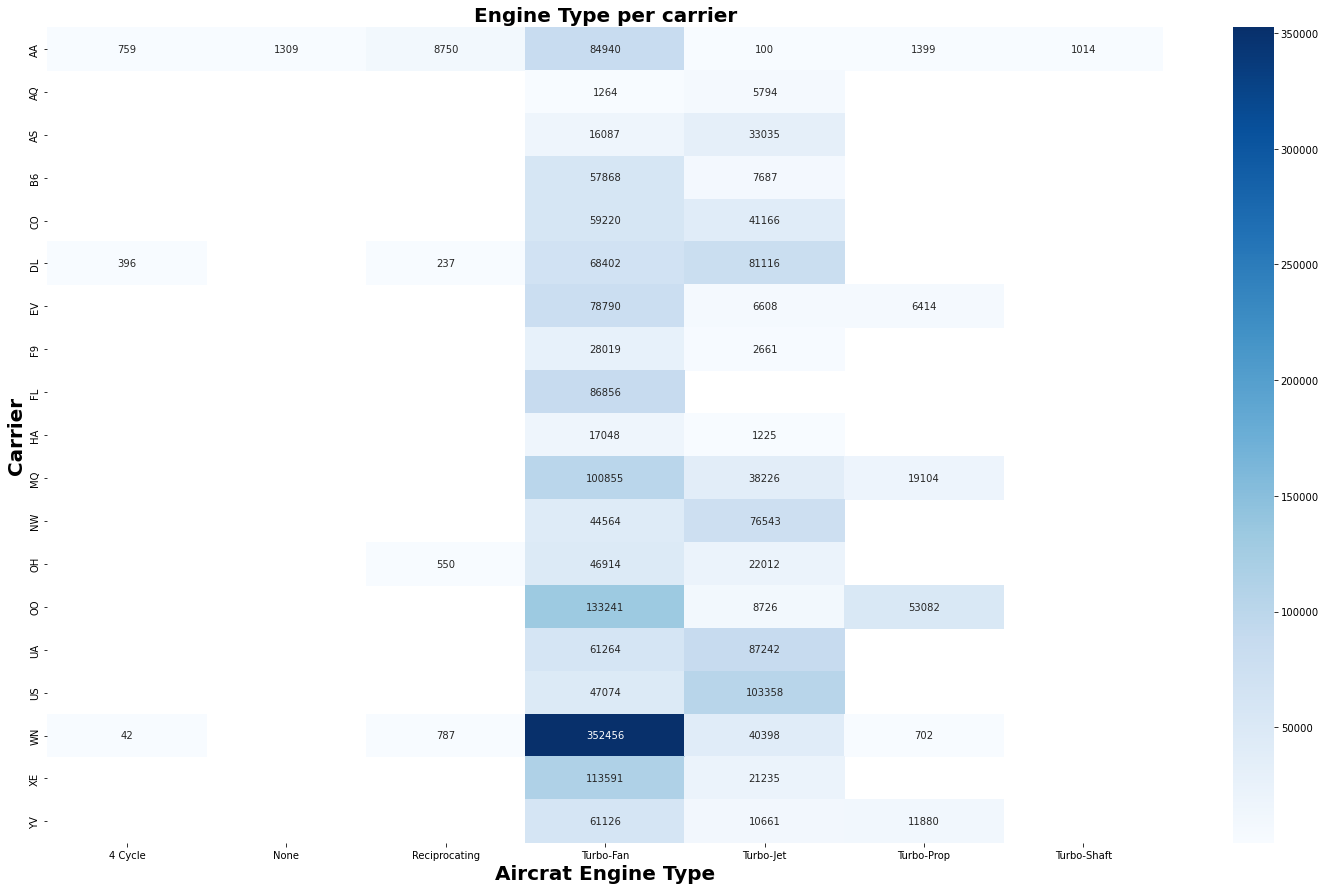

In [32]:
fig,ax = plt.subplots(figsize =(25,15))

sb.heatmap(unique_eng, annot =True, fmt ='.0f', cmap ='Blues',ax=ax)
chartLabels('Aircrat Engine Type','Carrier','Engine Type per carrier')

### **Question: What engine types are mostly found in aircraft types**

In [33]:
acft_engine = df_airline_plane.groupby(['aircraft_type', 'engine_type']).size().reset_index(name='count')


In [34]:
acft_engine = acft_engine.pivot(index='aircraft_type', columns='engine_type', values='count')

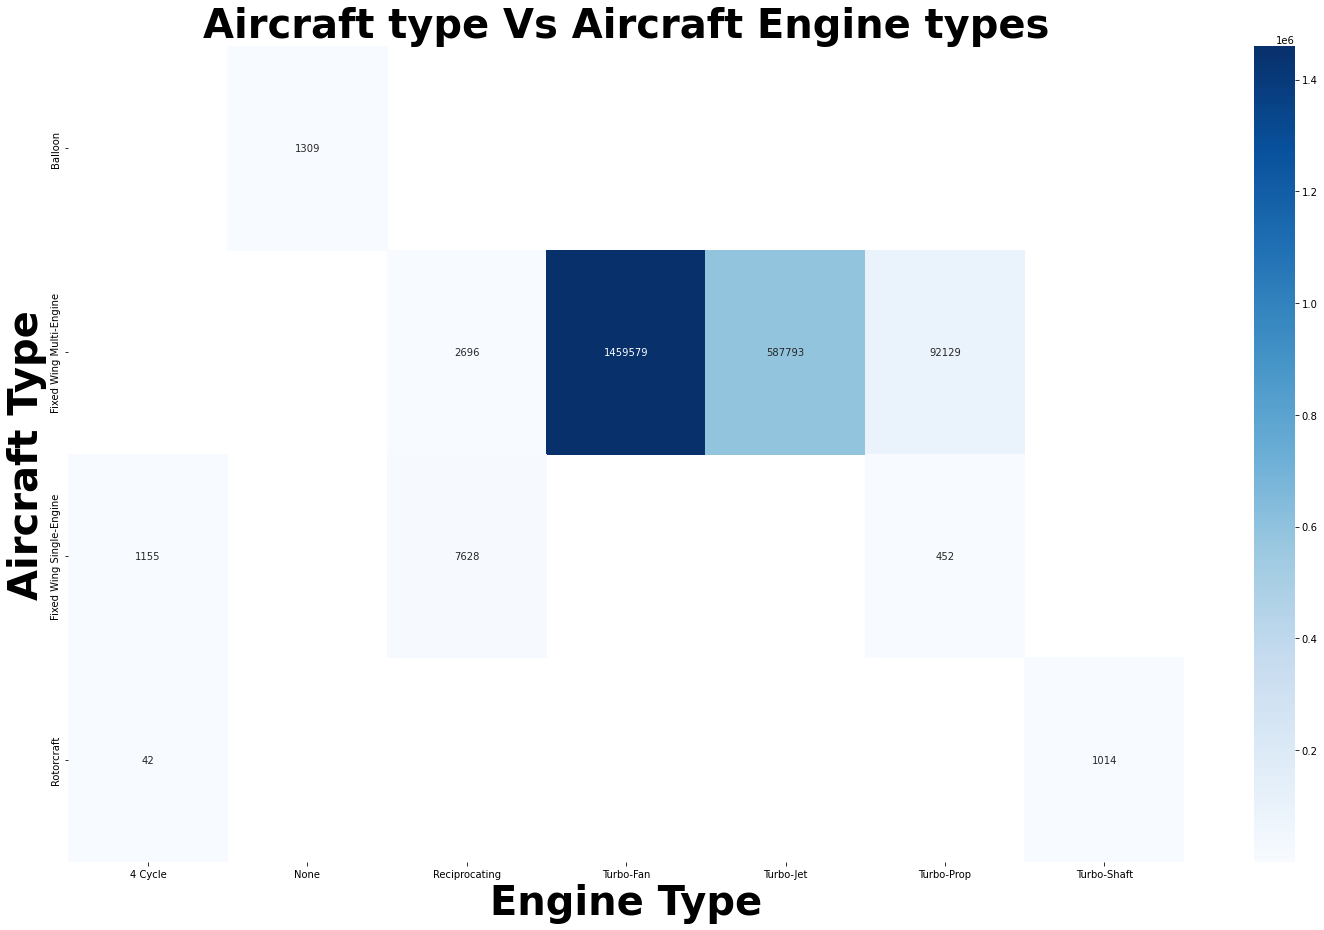

In [35]:
fig,ax = plt.subplots(figsize =(25,15))
sb.heatmap(acft_engine, annot =True, fmt ='.0f', cmap ='Blues',ax=ax)
ax.set_xlabel('Engine Type', size=(40), fontweight='bold')
ax.set_ylabel('Aircraft Type', size=(40), fontweight='bold')
plt.title( 'Aircraft type Vs Aircraft Engine types', size = 40, fontweight='bold');

Fixed-wing Multi engine aircraft mostly have Turbo-fan, Turbo-Prop and Turbo-Jet engines while Fixed wing single engine aircraft have a high number of reciprocating engines with few Turbo-Prop engines.Rotorcraft types is the only one that has Turbo-shaft together with few 4-cycle engines.Balloon aircraft does not use any of these engine types. It can be said that Fixed wingsingle-engine and fixed wing-multi-engine aircraft are the most common aircraft types.  

### **Questions: What engine types contribted most to Carrier and weather delays**

In [36]:
#getting dataframe for engine type with their assosciated carrier and weather delays
engine = df_airline_plane.groupby('engine_type')[['CarrierDelay', 'WeatherDelay']].sum()

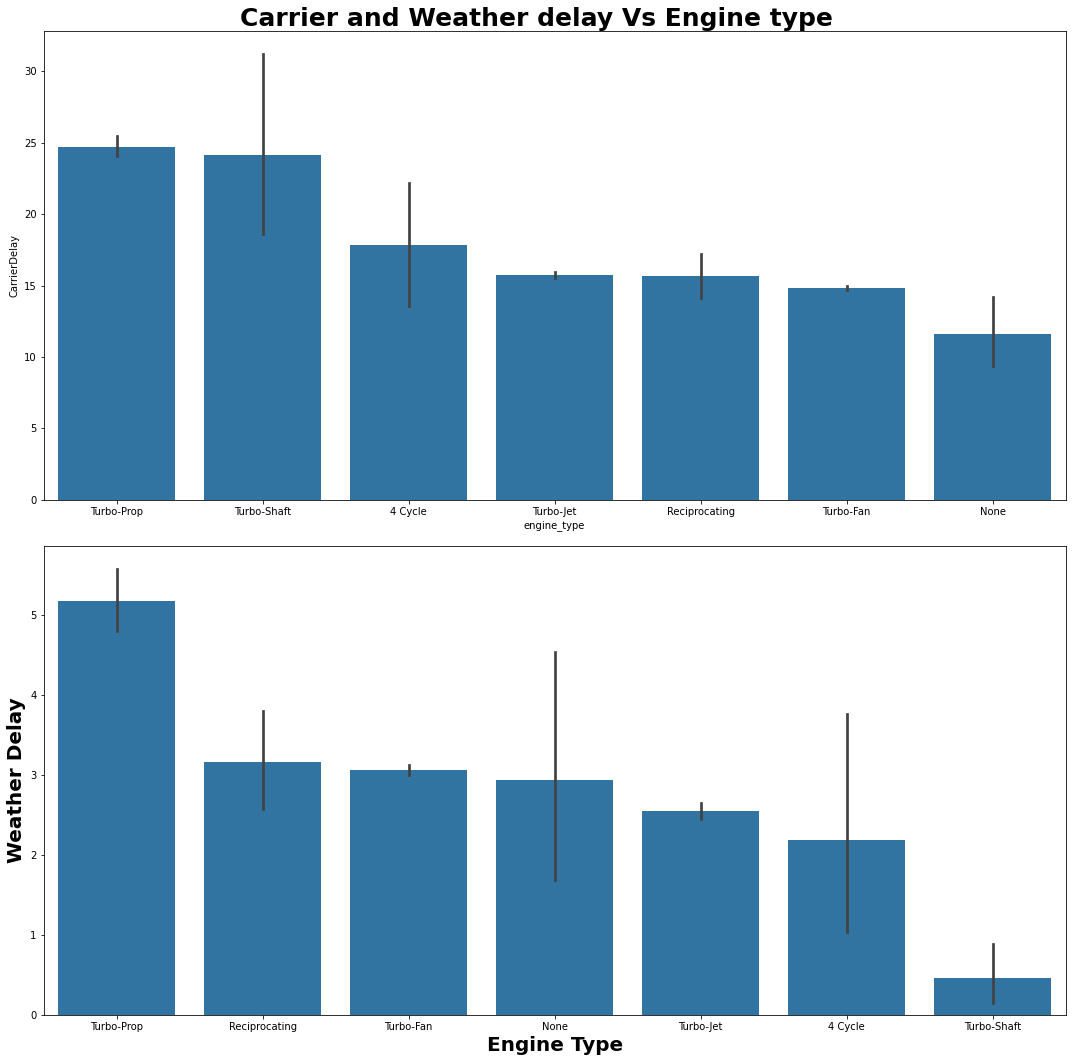

In [37]:
#getting the average number of weather and carrier delays
engine_carrier = df_airline_plane.groupby('engine_type')['CarrierDelay'].mean().sort_values(ascending=False).index
engine_weather = df_airline_plane.groupby('engine_type')['WeatherDelay'].mean().sort_values(ascending=False).index

#plotting bar plot
base_color = sb.color_palette()[0]
fig,ax = plt.subplots(2,1 , figsize=(15,15))

sb.barplot(data = df_airline_plane, x ='engine_type', y=df_airline_plane['CarrierDelay'], color = base_color, order = engine_carrier, ax=ax[0])
chartLabels('Engine Type','Weather Delay','')

sb.barplot(data = df_airline_plane, x ='engine_type', y=df_airline_plane['WeatherDelay'], color = base_color, order = engine_weather, ax=ax[1]);
chartLabels('Engine Type', 'Weather Delay','')



fig.suptitle('Carrier and Weather delay Vs Engine type', fontweight='bold', size =25);
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.show()

For the Carrier delay, Turbo-Shaft engines contributed most to the delays followed by Turbo-prop and 4-Cycle engines respectively. These engine types are the least commonly used among the aircraft manufacturers and their peculiarities towards delays could be one of the reasons most manufacturers do not use them. For weather delays,Turbo-Prop engines contributed most to the delays followed by reciprocating engines. others have approximately equal amountcontributions except Turbo-shaft which is least contributor to the delays 

### **Question:What type of aircrat and engine type were cancelled most**

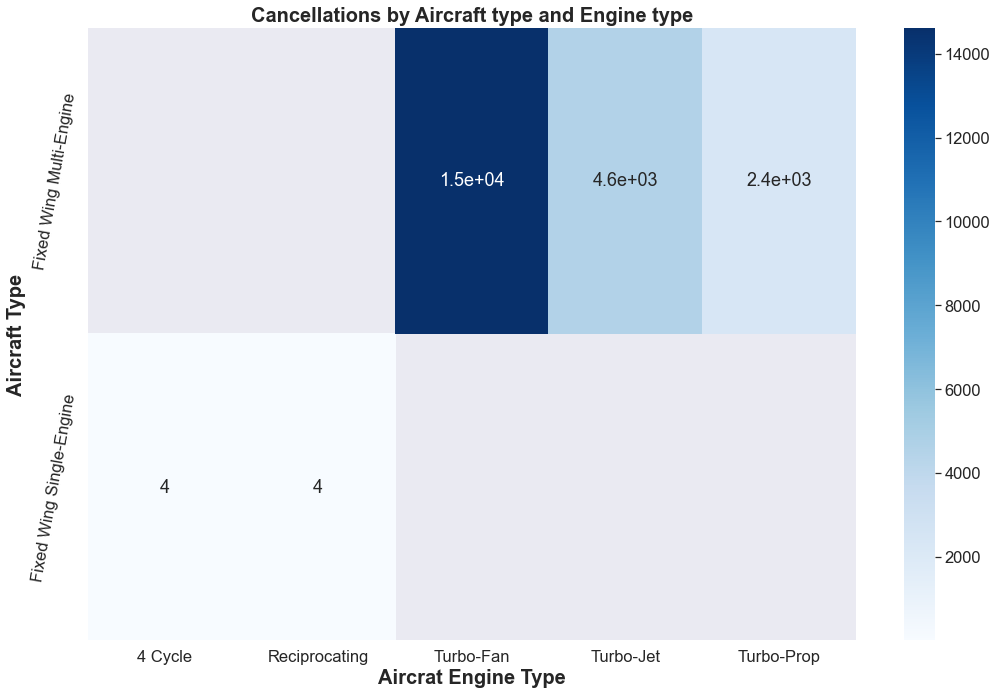

In [38]:
#Getting dataframe for flight cancelled
eng_cancelled = df_airline_plane.query('Cancelled=="1"') 

#plotting
df_heatmap = eng_cancelled.pivot_table(values='Cancelled', index='aircraft_type', columns='engine_type', aggfunc=np.sum)
plt.figure(figsize=(15,10))
sb.set(font_scale=1.5)
heat_map=sb.heatmap(df_heatmap, annot=True, cmap='Blues')
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=80)
chartLabels('Aircrat Engine Type','Aircraft Type','Cancellations by Aircraft type and Engine type')
plt.tight_layout()
plt.show()


Most cancellations involved Fixed wing multi-engine aircrafts with Turbo-fan,Turbo-jet and Turbo-prop engine types. Only 8 cancellations were from Fixed wing single-engine aircraft which has 4 reciprocating and 4-cylce engines. Other airline operations with rotorcraft and ballon aircraft were not cancelled.

### **Question: Which aircraft type contributed most to delays by Aircraft**

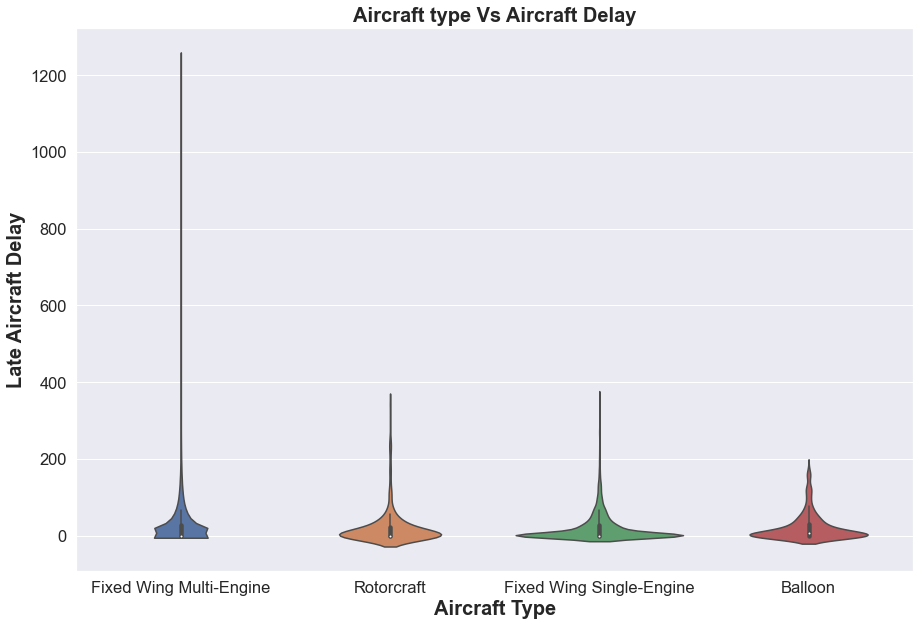

In [39]:
aircraft_type = ['Fixed Wing Multi-Engine','Rotorcraft','Fixed Wing Single-Engine', 'Balloon']

aircraft_type_class = pd.api.types.CategoricalDtype(ordered=True, categories=aircraft_type)
                 
df_airline_plane['aircraft_type'] = df_airline_plane['aircraft_type'].astype(aircraft_type_class);
plt.figure(figsize=(15,10))
sb.violinplot(data=df_airline_plane, x='aircraft_type', y='LateAircraftDelay');
chartLabels('Aircraft Type','Late Aircraft Delay','Aircraft type Vs Aircraft Delay')

While the median values for all late aircraft delay across all engine types are approximately equal, the Fixed wing singele-engine contributed most to the later aircraft delays followed by the Ballon and Rotorcraft engines. Fixed wing multi-engine contributed least to the late aircraft delay which could be a reason most manufcturers use them alot. Besides, the fixed wing multi engine mostly have Turbo-fan engine types which in turn contribute low to carrier and wather delays.

### **Question: Which aircraft engine type contributed most to delays due to aircraft**

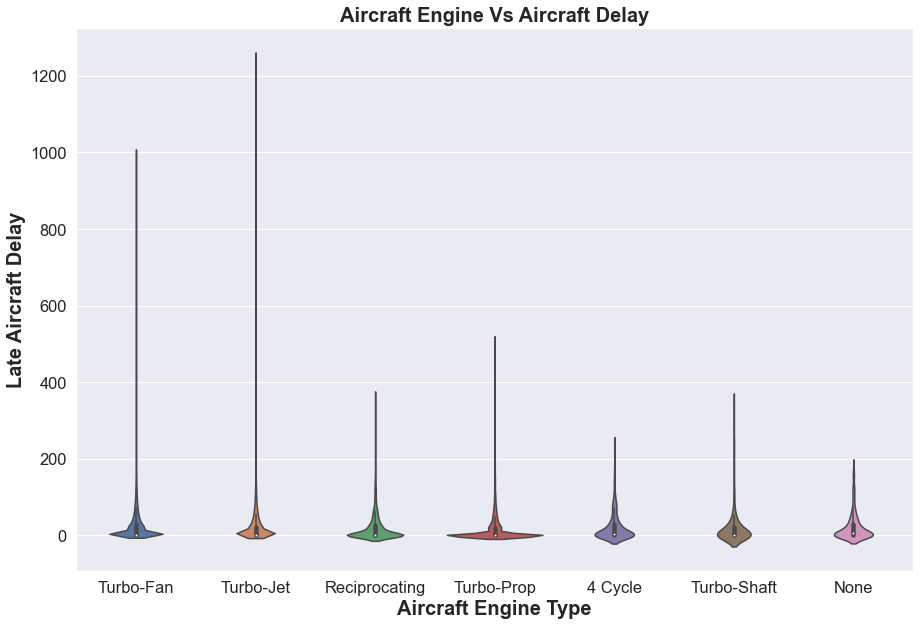

In [40]:
plt.figure(figsize=(15,10))
sb.violinplot(data=df_airline_plane, x='engine_type', y='LateAircraftDelay');
chartLabels('Aircraft Engine Type','Late Aircraft Delay','Aircraft Engine Vs Aircraft Delay')

Turbo-prop engines contributed most to late aircraft delays just like it did for carrier and weather delays as well as high cancellations when used in fixed wing multi-engine aircraft. This could be a reason few manufacturers used them.

# **Multivariate Exploration**

### **Question: Does the number of flights from certain Airports affects arrival delay times** 

In [41]:
#Counting number of flights by destination
#Origin and destination should be assumed Destination depending on whenther an aircraft is arriving or departing a particular airport
flights_origin = df_airline_plane.groupby('Origin').size().sort_values(ascending=False)

In [42]:
#getting average arrival delay time form each of the originating airports
flights_arrival = df_airline_plane.groupby('Origin')['ArrivalDelayTime'].mean()


In [43]:
#Create dataframe for top airports and average arrival delays for each by destination
delay_by_origin = pd.concat([flights_origin,flights_arrival],axis=1).reset_index()
delay_by_origin.columns= ['Origin','Flights','Average_Arrival_Delay']

In [44]:
#Sorting number of flight values by descending order (busiest origins first)
delay_by_origin = delay_by_origin.sort_values('Flights',ascending=False)

In [45]:
#creating a column for originating airports and categorising them into two groups (Top 50 and the rest)
delay_by_origin['Airport_Traffic']=np.nan
delay_by_origin.iloc[:50,3] = 'Busy airports'    
delay_by_origin.iloc[50:100,3] = 'Less busy airports'

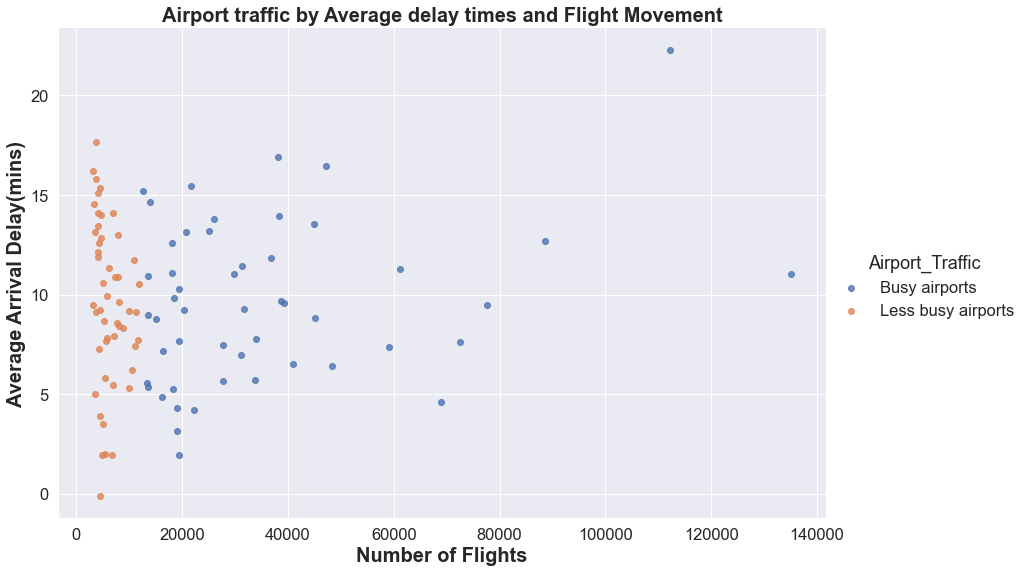

In [54]:
#Plotting 
g=sb.FacetGrid(data=delay_by_origin, hue='Airport_Traffic', hue_order=['Busy airports','Less busy airports'], height=8, aspect=1.5)
g=g.map(sb.regplot,'Flights','Average_Arrival_Delay',x_jitter=0.4,fit_reg=False);
g.add_legend()
chartLabels('Number of Flights', 'Average Arrival Delay(mins)','Airport traffic by Average delay times and Flight Movement');

The number of From the plot, it appears that number of flights movement had an effect on average arrival delay as shown by the color encoding. This is not so much true for less busy airports where the number of aircraft movements are relatively lesser. This could also be true for average departure delays due to the similarities in the distribution arrival and departure variables.

### **Question:What is the trend of flight delays and which delay type contributed most to flight delays**

In [47]:
#Changing months to ordered categorical data type
Month = ['Jan','Feb','Mar','Apr']

Month_classes = pd.api.types.CategoricalDtype(ordered=True, categories=Month)

df_airline_plane['Month'] = df_airline_plane['Month'].astype(Month_classes);

In [48]:
#creating dataframe for each of the delay reasons monthly and determine their average delay times
carrier_delay = df_airline_plane.query('CarrierDelay>0').groupby('Month')['CarrierDelay'].mean().reset_index(name='CarrierDelay').sort_values(by='Month')
weather_delay = df_airline_plane.query('WeatherDelay>0').groupby('Month')['WeatherDelay'].mean().reset_index(name='WeatherDelay').sort_values(by='Month')
NAS_delay = df_airline_plane.query('National_AirSystem_Delay>0').groupby('Month')['National_AirSystem_Delay'].mean().reset_index(name='National_AirSystem_Delay').sort_values(by='Month')
security_delay = df_airline_plane.query('SecurityDelay>0').groupby('Month')['SecurityDelay'].mean().reset_index(name='SecurityDelay').sort_values(by='Month')
lateaircraft_delay = df_airline_plane.query('LateAircraftDelay>0').groupby('Month')['LateAircraftDelay'].mean().reset_index(name='LateAircraftDelay').sort_values(by='Month')


In [49]:
#Merging the dataframes
df1=carrier_delay.merge(weather_delay,on='Month')
df2=df1.merge(NAS_delay,on='Month')
df3=df2.merge(security_delay,on='Month')
df4=df3.merge(lateaircraft_delay,on='Month')


In [50]:
df_delay_reasons_byMonth = df4.sort_values('Month',ascending=True)

<function matplotlib.pyplot.show(close=None, block=None)>

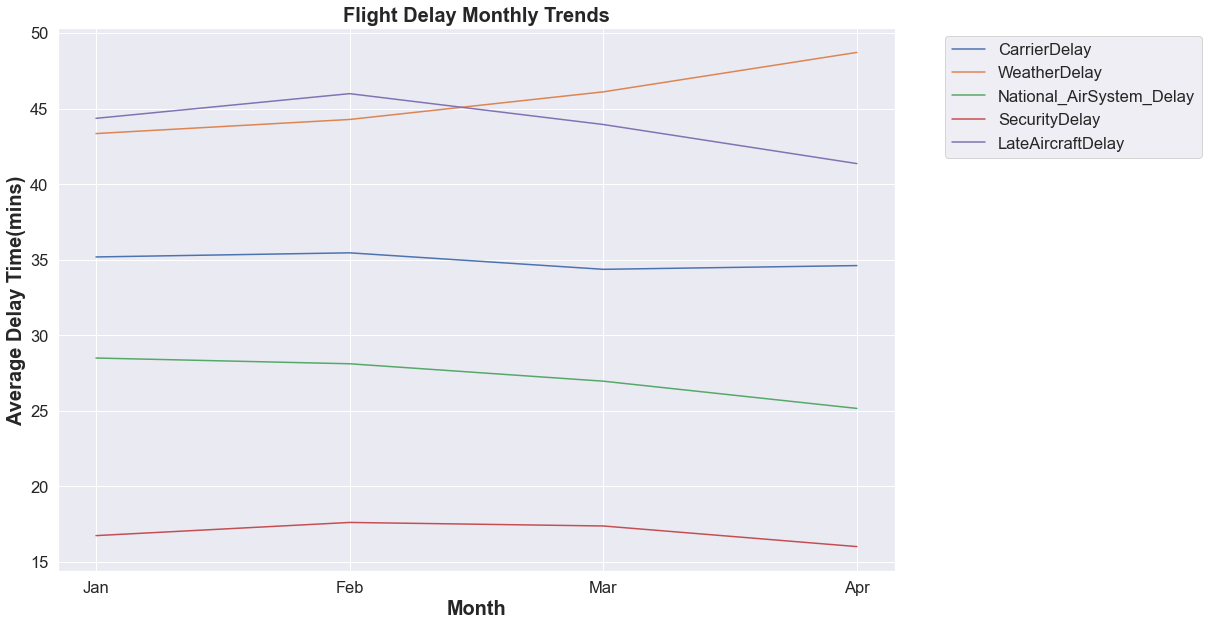

In [51]:
plt.figure(figsize=(15,10))
plt.errorbar(x=df_delay_reasons_byMonth.Month,y=df_delay_reasons_byMonth.CarrierDelay)
plt.errorbar(x=df_delay_reasons_byMonth.Month,y=df_delay_reasons_byMonth.WeatherDelay)
plt.errorbar(x=df_delay_reasons_byMonth.Month,y=df_delay_reasons_byMonth.National_AirSystem_Delay)
plt.errorbar(x=df_delay_reasons_byMonth.Month,y=df_delay_reasons_byMonth.SecurityDelay)
plt.errorbar(x=df_delay_reasons_byMonth.Month,y=df_delay_reasons_byMonth.LateAircraftDelay)
plt.legend(['CarrierDelay','WeatherDelay','National_AirSystem_Delay','SecurityDelay','LateAircraftDelay'],bbox_to_anchor=(1.05,1.0))
chartLabels('Month','Average Delay Time(mins)','Flight Delay Monthly Trends')

plt.show


The graph shows that weather and late aircraft reasons contributed most to overall delays as compared to others. Security reasons contributed least with a downward trend from February to April while national air system contributions was above security with downward trend from January to April.Carrier delay times were approxiamtely consistent from January to April and higher than national air system contributions. Weather delays had steep increase from January to April while Late aircraft delays contribution increased from January to February and consistently decrease from then till April. 

# **Conclusion**

The flight data set exploration presents insights on operational performance as related to airline operations across airports in the USA, with emphasis on the variables that directly affects flight movements. Univariate analysis was carried out on the data and it was observed that most of the flight movements were not cancelled or diverted while average of 23% of the flights had delays on arrival and departure. These findings cuts across all the 20 unique carriers that operated in the year. Bivariate and multivariate analysis were also carried out to delve more into this findings in relation to plane/aircraft information after which all findings were documented at the end of each exploration phase. 

# **Reference**

> - Udacity class room
> - Numpy documentation
> - Pandas documentation
> -matplotlib documentation
> -https://stackoverflow.com/questions/
> -www.askpython.com
> -www.w3schools.com
> -www.geeksforgeeks.org
> -www.pythonguides.com

